## Algoritmo PageRank (by Google)

In [15]:
from __future__ import print_function
from __future__ import division
import random as random
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Algunos grafos...
G0 = ((2,3,4,5),(0,),(1,3),(4,),(3,5),(4,6),(0,))
G1 = ((2,), (0, 5, 3), (6, 0, 2, 7, 4), (3, 1), (1, 4, 2, 9, 5, 6, 3, 8, 7), (0, 4, 5), (6, 9, 0), (3, 9), (7, 2, 6, 5, 3, 1, 0), (2, 0))
G2 = ((94, 59, 18, 34, 68, 52, 47, 92, 99, 55, 24, 22, 65, 21, 84, 88, 27, 35, 40, 36, 56, 86, 60, 90, 69, 67, 11, 44, 81, 0, 75, 20, 91, 42), (33, 41, 3, 75, 95, 28, 13, 25, 32, 38, 2, 42, 63, 15, 24), (95, 2, 23, 29, 62, 13, 49, 53, 78, 82, 27, 84, 67, 6, 18, 34, 16, 8, 20, 44, 83, 45, 60, 22, 66, 5, 56, 97, 11, 26, 87, 92, 42, 12, 4, 41, 71, 76, 51, 40, 89, 19, 99, 48, 81, 0, 50, 35, 10, 68, 30, 69, 55, 94, 28, 25, 65, 73, 24, 72, 17, 90, 32, 64, 93, 59, 85, 39), (70, 80, 83, 76, 24, 40, 62, 92, 51, 69, 19, 55, 28, 64, 33, 34, 31, 42, 45, 67, 95, 60, 12, 9, 22, 52, 18, 3, 25, 46, 78, 68, 2, 77, 53, 49, 38, 87, 88, 37, 99, 23, 0, 72, 96, 56, 36, 71, 13, 82, 91, 81, 85, 79, 50, 17, 59, 44, 5, 93, 43, 6, 65, 98, 54, 94, 21, 63, 1, 74, 15, 66, 4, 10, 16, 14, 39, 27, 8, 75, 86, 20, 57, 35, 73, 48, 7, 47, 41, 29, 32, 26, 61, 90, 84, 97, 30), (36, 38, 45, 83, 29, 68, 43, 57, 81, 20, 9, 37, 16, 63, 73, 34, 92, 76, 79, 71, 32, 47, 94, 77, 87, 10, 58, 74, 59, 46, 78, 15, 1, 86, 67, 51, 31, 91, 26, 39, 30, 54, 11, 95, 65, 44, 40, 14, 41, 53, 84, 89, 96, 6, 80, 18, 52, 60, 33, 23, 75, 22, 85, 25, 64, 27, 7, 17, 48, 93, 8, 19, 13, 97), (66, 21, 31, 8, 95, 1, 84, 56, 80, 3, 86, 65, 61, 85, 89, 97, 14, 2, 4, 30, 53, 41, 58, 72, 46, 24, 43, 90, 18, 82, 44, 36, 40, 35, 69, 0, 76, 26, 19, 88, 98, 11, 93, 96, 25, 37, 59, 74, 71, 29, 79, 32, 27, 99, 83, 15, 63, 70, 17, 77, 68, 50, 60, 28, 38, 39, 22, 92, 10, 57, 16, 33, 20, 23, 13, 64, 12, 34, 52, 7, 45, 5, 47, 6, 62, 55, 51, 54, 78, 42, 75, 87, 91, 48, 67), (79, 15, 63, 96, 9, 65, 37, 50, 43, 97, 78, 83, 28, 35, 21, 82, 88, 31, 34, 84, 74, 87, 24, 92, 67, 53, 62, 61, 66, 90, 41, 29, 47, 80, 58, 55, 19, 48, 64, 22, 18, 49, 71, 2, 51, 38, 46, 85, 91, 76, 77, 11, 45, 8, 12, 98, 89, 44, 1, 99, 42, 54), (57, 1, 97, 82, 27, 24, 59, 48, 41, 99, 8, 73, 53, 88, 46, 86, 90, 37, 94, 60, 11, 54, 19, 38, 15, 45, 80, 9, 35, 14, 50, 29), (10, 16, 90, 67, 84, 80, 7, 47, 32, 1, 95, 89, 38, 58, 46, 43, 65, 62, 73, 14, 25, 20, 50, 76, 53, 61, 87, 88, 63, 9, 82, 77, 4, 74, 94), (33, 16, 40, 48, 11, 59, 38, 30, 14, 15, 19, 9, 87, 51, 45), (68, 13, 36, 34, 6, 71, 4, 10, 17, 82, 93, 51, 55, 19), (35, 61, 8, 29, 15, 12, 3, 91, 27, 78, 64, 67, 56, 54, 37, 50, 2, 86, 68, 20, 92, 40, 98, 90, 95, 26, 59, 38, 47, 1, 34, 46, 49, 0, 76, 22, 60, 82, 97, 33, 10, 74, 39, 32, 69, 11, 44, 36, 58, 94, 66, 88, 51, 96, 77, 84, 57, 18, 52, 93), (75, 13, 41, 22, 82, 62, 81, 11, 23, 4, 89, 78, 79, 48, 85, 76, 18, 46, 1, 30, 33, 71, 94, 91, 60, 55, 24, 7, 31, 12, 6, 95, 50, 73, 19, 9, 49, 96, 15, 63, 65, 66, 3, 93, 35, 40, 83, 52, 42, 2, 43, 74, 87, 69, 44, 86, 57, 27, 20, 5, 10, 70, 67, 8, 97, 59, 38, 61, 88, 45, 72, 53, 80, 90, 39, 84, 58, 77, 17, 68, 29, 36, 47, 26, 64, 99, 51, 54, 56, 32, 21, 28, 0, 98, 25, 92, 16, 37), (17, 61, 21, 98, 34, 89, 50, 90, 33, 77, 20, 72, 22, 45, 26, 5, 39, 79, 97, 44, 25, 15, 55, 18, 3, 43, 71, 30, 80, 14, 48, 28, 42, 85, 11, 83, 64, 84, 13, 37, 57, 10, 46, 94, 9, 31, 92, 88, 91, 58, 96, 93, 99, 62, 73, 63, 95, 65, 2, 16, 24, 81, 82, 75, 49, 36, 32, 74, 69, 38, 53, 68, 27, 7, 66, 60, 54, 51), (82, 87, 8, 38, 43, 64, 93, 48, 58, 96, 72, 1, 44, 42, 88, 84, 81, 34, 26, 9, 57, 63, 22, 45, 28, 6, 15, 59, 90, 67, 24, 29, 51, 11, 85, 13, 32, 14, 16, 23, 94, 39, 27, 5, 18, 30, 65, 98, 19, 75, 35, 54, 78, 20, 52, 33, 12, 49, 66, 50, 56, 97, 89, 7, 36, 31, 10, 95, 73, 47, 3, 69, 55, 70, 2, 60, 74, 71, 41, 99, 37, 25, 91, 62, 0, 83, 77, 79, 61, 86, 46, 76, 53, 17, 92, 4, 40, 21, 80), (44, 93, 74, 52, 30, 51, 10, 31, 73, 6, 80, 8, 32, 96, 65, 90, 61, 36), (24, 75, 64, 65, 96, 59, 33, 15, 61, 21, 45, 43, 12, 37, 40, 36, 99, 9), (58, 61, 82, 30, 38, 40, 96, 69, 1, 60, 66, 42, 81, 86, 88, 89, 49, 46, 87, 21, 79, 76, 48, 44, 53, 23, 80, 62, 3, 43, 68, 19, 67, 13, 26, 57, 94, 95, 15, 37, 54, 39, 4, 34, 33, 64, 7), (87, 98, 41, 89, 42, 97, 60, 84, 77, 86, 78, 76, 16, 92, 21, 81, 50, 9, 58, 56, 29, 24, 10, 36, 88, 69, 27, 38, 0, 22, 68, 96, 25, 83, 70, 35, 55, 52, 94, 39, 63, 90, 12, 57, 67, 48, 75, 71, 2, 18, 51, 66, 72, 54, 1, 91, 73, 13), (71, 90, 59, 88, 96, 50, 34, 57, 0, 84, 54, 72, 52, 27, 94, 60, 21, 25, 44, 22, 40, 35, 43, 97, 14, 63, 75, 2, 41, 81, 30, 58, 29, 93, 77, 23, 61, 79, 98, 10, 39, 7, 76, 66, 51, 56, 89, 26, 9, 80, 18), (70, 0, 72, 16, 50, 8, 49, 91, 31, 7, 92, 87, 19, 82, 94, 69, 52, 28, 68, 12), (70, 72, 87, 57, 76, 13, 29, 84, 88, 66, 92, 69, 82, 44, 79, 59, 39, 40, 56, 20, 6, 25, 45, 22, 89, 23, 49, 74, 14, 68, 53, 9, 3, 61, 5, 77, 1, 83, 28, 37, 46, 15, 91, 36, 78, 42, 75, 60, 97, 21, 41, 96, 35, 10, 98, 8, 19, 80, 95, 58, 4, 67, 12, 99, 86), (24, 70, 39, 78, 17, 94, 62, 97, 50, 89, 15, 19, 34, 82, 11, 29, 57, 43, 75, 55, 47, 38, 31, 54, 65, 33, 84, 76, 49, 92, 83, 98, 14), (60, 68, 30, 85, 25, 4, 9, 3, 23, 7, 67, 94, 65, 53, 40, 15, 66, 84, 75, 18, 82, 46, 10, 38, 11, 26, 86, 89, 71, 47, 58, 70, 29, 96, 61, 76, 88, 56, 33, 22), (62, 33, 87, 94, 60, 73, 96, 21, 84, 91, 54, 26, 69, 1, 39, 35, 12, 75, 72, 4, 48, 30, 80, 67, 57, 45, 38, 92, 22, 68, 3, 10, 59, 28, 17, 50, 23, 88, 11, 52, 71, 90, 36, 41, 65, 15, 42, 79, 34, 18, 37, 13, 29, 6, 43, 25, 47, 83, 53, 32, 70, 81, 46, 99, 98, 95, 5, 97, 85, 49, 86, 89, 14, 51, 8, 24), (84, 27, 21, 5, 4, 31, 52, 81, 55, 32, 67, 54, 7, 12, 17, 90), (50, 14, 83, 81, 10, 57, 3, 7, 70, 23, 58, 6, 47, 78, 93, 61, 59, 46, 33, 43, 60, 44, 74, 99, 42, 55, 22, 1, 91, 27, 21, 0, 13, 84, 95, 5, 79, 90, 66, 19, 68, 40, 86, 34, 62, 26, 2, 53, 29, 92, 73, 41, 12, 51, 94, 72, 30, 64, 69, 9, 88, 8, 25, 63, 18, 48, 17, 49, 82, 32, 98, 31, 20), (23, 49, 86, 2, 50, 64, 39, 40, 16, 20, 13, 95, 8, 34, 35, 88, 82, 33, 27, 30, 55, 31, 58, 96, 81, 1, 22, 43, 94, 28, 47, 4, 21, 10, 53, 63, 5, 52, 84, 72, 85, 9, 17, 93, 3, 60, 12, 6, 79, 57, 68, 48, 62, 98, 56, 32, 25, 74, 65, 7, 92, 11, 67, 90, 54, 59, 70, 19, 87, 71, 76, 18, 37, 38), (66, 65, 71, 30, 85, 45, 13, 12, 5, 74, 62, 46, 54, 37, 96, 82, 22, 63, 26, 88, 36, 14, 24, 79, 67, 3, 86, 9, 41, 61, 31, 94, 53, 1, 50, 81, 58, 69, 52, 59, 18, 23, 38, 73, 93, 92), (75, 30, 74, 69, 58, 56, 61, 54, 35, 50, 96, 17, 5, 67, 66, 97, 28, 40, 44, 7, 81, 78, 38, 79, 72, 59, 86, 99, 57, 51, 83, 27, 21, 22, 70, 18, 31, 60, 20, 88, 14, 32, 12, 11, 2, 23, 84, 29, 82, 26, 98, 37, 85, 1, 0, 94, 48, 33, 90, 36, 9, 19, 95, 39, 87, 4, 10, 71, 80, 6, 92), (98, 11, 34, 12, 74, 32, 40, 96, 44, 57, 30, 46, 72, 10, 47, 42, 66, 16, 82, 95, 78, 9, 23, 80, 64, 70, 79, 48, 92, 73, 27, 86, 53, 41, 35, 81, 15, 33, 26, 88, 59, 31, 39, 49, 5, 25, 68, 24, 84, 7, 77, 4, 29, 71, 2, 69, 13, 85, 36, 3, 6, 97, 38, 65, 20, 18, 8, 89, 67, 90, 91, 63, 83, 58, 21, 52, 37, 50, 14, 1, 75, 87, 22, 56, 60, 17, 55), (75, 51, 13, 25, 9, 20, 76, 31, 72), (29, 13, 32, 7, 3, 89, 8, 65, 97, 42, 53, 86, 94, 18, 66, 98, 61, 64, 2, 23, 48, 9, 24, 37, 25, 73, 79, 45, 57, 78, 92), (87, 67, 64, 85, 76, 1, 63, 89, 43, 0, 94, 15, 71, 65, 9, 79, 12, 2, 20, 80, 26, 30, 34, 14, 97, 10, 7, 75, 37), (67, 29, 30, 47, 34, 8, 98, 72, 54, 24, 43, 44, 87, 55, 80, 65, 16, 91, 17, 74, 13, 35, 6, 95, 63, 99, 38, 82, 23, 76, 94, 92, 52, 69, 31, 41, 11, 66, 40, 75, 12, 58, 4, 15, 56, 81, 28, 5, 68, 36, 89, 71, 53, 84, 59, 50, 90, 64, 22, 48, 18, 93, 79, 14, 51, 42, 27, 46, 9, 97, 62, 33, 39, 83, 86, 1, 19, 0, 25, 77, 2, 37, 70, 85, 20, 88, 49, 7, 26, 61, 60), (85, 37, 3, 38, 0, 94, 74, 21, 75, 31, 46, 55, 33, 49, 62, 35, 23, 78, 9, 20, 92, 56, 83, 88, 93, 43, 77, 32, 14, 52, 72, 28, 73, 25, 10, 87, 18, 64, 5, 7, 2, 86, 48, 12, 22, 29, 67, 30, 58, 57, 69, 98, 17, 15, 13, 47, 90, 79, 41, 76, 65, 66, 24, 97, 1, 91, 61, 34, 27, 6, 42, 81, 68, 80, 11, 4, 82, 60, 36, 53, 45, 40, 39, 59, 89, 71), (56, 55, 41, 75, 27, 99, 73, 72, 76, 90, 29, 82, 57, 6, 53, 64, 13, 78, 63, 93, 9, 18, 43, 3, 39, 79, 66, 69, 61, 46, 59, 50, 17, 58, 89, 5, 51, 67, 0, 32, 33, 36), (62, 24, 16, 65, 7, 68, 92, 52, 21, 84, 77, 70, 33, 26, 10, 43, 39, 45, 4, 23, 96, 47, 83, 20, 50, 46, 69, 55, 28, 59, 95, 82, 30, 5, 29, 49, 75, 71, 1, 76, 31, 67, 3, 86, 85, 19, 98, 57, 25), (63, 48, 18, 35, 30, 89, 37, 62, 9, 79, 72, 8, 33, 95, 55, 97, 90, 26, 52, 14, 68, 1, 21, 32, 81, 82, 42, 94, 3, 11, 54, 45, 34, 15, 50, 91, 75, 51, 77, 20, 71, 6, 56, 0, 27, 65, 23, 84, 29, 76, 73, 46, 4, 38, 96, 57, 59, 16, 92, 88, 19, 40, 70, 22, 24, 86, 43, 80, 66), (74, 39, 62, 33, 14, 95, 17, 8, 43, 31, 28, 84, 56, 52, 34, 91, 77, 90, 47, 0, 96, 88, 81, 99, 44, 22, 49, 86, 79, 82, 80, 87, 4), (8, 68, 90, 51, 5, 81, 85, 16, 46, 59), (57, 69, 26, 43, 48, 83, 33, 61, 24, 8, 91, 37, 12, 78, 11, 2, 55, 85, 15, 3, 79, 29, 62, 75, 74, 93, 4, 51, 22, 64, 95), (13, 5, 29, 96, 4, 54, 79, 25, 85, 10, 15, 9, 17, 20, 57, 69, 28, 12, 1, 16, 99, 37, 48), (7, 99, 12, 91, 43, 14, 40, 32, 67, 54, 18, 56, 6, 78, 87, 5, 64, 49, 80, 96, 97, 26, 69, 15, 45, 84, 76, 82, 21, 52, 44, 74, 66, 83, 65, 23, 77, 11, 47, 95, 94, 35, 31, 57, 48, 85, 9, 92, 59, 58, 93, 51, 28, 70, 8, 79, 61, 16, 33, 27, 37, 25, 73, 42, 46, 34, 19, 88, 0, 71, 17, 2, 38, 39, 62, 30, 75, 89, 63, 22, 4, 53, 68, 90, 86, 81, 29, 60), (79, 24, 63, 44, 68, 26, 46, 41, 55, 78, 81, 59, 12, 98, 88, 95, 84, 56, 2, 47, 80, 67, 85, 53, 22, 77, 43, 75), (72, 78, 88, 25, 22, 67, 55, 84, 38, 75, 17, 94, 37, 32, 92, 59, 3, 74, 96, 0, 56, 64, 20, 43, 80, 29, 8), (78, 22, 68, 50, 23, 75, 33, 87, 5, 0, 64, 7, 24, 91, 49, 79, 48, 42, 85, 76, 8, 83, 89, 93, 3, 69, 12), (40, 39, 54, 79, 85, 42, 38, 97, 22, 60, 44, 11, 7, 98, 81, 45, 61, 84, 86, 34, 58, 13, 16, 82, 35, 76), (5, 22, 35, 62, 24, 75, 38, 93, 76, 28, 39, 30, 89, 79, 52, 27, 7, 49, 48, 80, 25, 86, 61, 71, 47, 66, 12, 36, 45, 23, 60, 44, 42, 43, 67, 50, 26, 37, 51, 77, 99, 13, 87, 1, 95, 6, 88, 16, 96), (82, 76, 88, 95, 17, 49, 80, 87, 5, 28, 73, 42, 36, 52, 98, 10, 18, 43, 46, 38, 54, 72, 34, 40, 75, 29, 20, 60, 62, 55, 27, 90, 67, 48, 1, 45, 74, 53, 33, 30, 92, 71, 12, 7, 15, 69, 21, 13, 64, 66, 4, 11, 91, 44, 51, 8, 14, 3, 68, 93, 57, 16, 89, 63, 83, 35, 9, 23, 25, 32, 94, 81, 0, 19, 26, 84, 6, 2, 50, 41, 39, 59, 65, 22, 31, 86, 77, 78, 97), (86, 91, 97, 84, 38, 9, 57, 20, 64, 48, 47, 7, 41, 67, 34, 19, 29, 79, 36, 74, 70, 75, 85, 96, 18, 13, 87, 90, 56, 54, 58, 83, 65, 3, 81, 32, 35, 59, 66, 39, 52, 37, 22, 68, 28, 26, 78, 5, 43, 45, 89, 8, 94, 62, 6, 99, 15, 46, 23, 69, 61, 77, 25, 73, 40, 49, 44, 33, 72, 98, 71, 4, 82, 21, 2, 12, 93, 60, 24, 53, 31, 17, 92, 30, 55, 50, 63, 14, 95, 0, 16), (71, 53, 54, 78, 14, 3, 29, 68, 87, 66, 23, 0, 72, 1, 33, 4, 37, 93, 94, 52, 34, 74, 6, 7, 57, 97), (47, 84, 23, 74, 22, 83, 35, 76, 54, 7, 34, 91, 66, 28, 16, 41, 61, 67, 55, 32, 99, 10, 78, 27, 63, 39, 36, 52, 13, 50, 4, 38, 21, 53, 94, 85, 88, 12, 45, 43, 97, 98, 0, 37, 75, 70, 79, 80, 33, 72, 1, 60, 26, 51, 24, 86, 9, 87, 90, 46, 6, 57), (43, 51, 44, 37, 28, 1, 76, 75, 68, 70, 53, 59, 85, 97, 12, 77, 7, 88, 54, 64, 89, 61, 67, 40, 55, 4, 26, 18, 63, 25, 38, 42, 41, 50, 35, 30), (21, 86, 54, 66, 41, 18, 90, 77, 67, 27, 4, 63, 75, 23, 55, 74, 92, 71, 29, 31, 53, 1, 73, 6, 47, 79, 5, 30, 58, 25, 82, 48, 83, 15, 13, 35, 61, 56, 68, 87, 19, 64, 91, 98, 99, 59, 42, 89, 36, 2, 32, 33, 10, 69, 17, 62, 43, 40, 96, 50, 46, 16, 84, 39, 85, 57, 81, 51, 28, 0, 26, 38, 76, 14, 60, 8, 44, 37), (33, 37, 77, 67, 30, 14, 91, 38, 90, 60, 85, 66, 6, 47, 95, 61, 56, 21, 43, 88, 9, 13, 19, 87, 20, 18, 52, 5, 78, 84, 49, 48, 53, 36, 44, 63, 40, 4, 8, 39, 62, 92, 17, 97, 29, 70, 65, 80, 64, 12, 81, 54, 27, 57, 35, 73, 89, 24, 68, 74, 42, 23, 86, 7), (47, 59, 85, 9, 86, 13, 55, 16, 68), (46, 48, 65, 30, 15, 99, 60, 96, 81, 79, 12, 66, 61, 26, 3, 18, 72, 49, 0, 94, 55, 76, 64, 21, 8, 75, 56, 44, 80, 35, 11, 47, 31, 36, 90, 91, 5, 52, 77, 33, 84, 43, 57, 19, 54, 6, 85, 69, 45, 40, 32, 9, 89, 97, 17, 10, 29, 78, 88, 2, 70, 22), (29, 70, 51, 68, 4, 17, 41, 28, 65, 74, 31, 55, 82, 42, 49, 44, 83, 84, 50, 98, 33, 2, 22, 38, 20, 11, 23, 60, 64, 40, 1, 58, 96, 91, 59, 87, 47, 76, 45, 34, 56, 0, 48, 79, 92, 15, 26, 6, 36, 57, 78, 86, 12, 88, 3, 63, 25, 71, 30, 72, 32, 69, 73, 75, 99, 13, 46, 43, 39, 93, 77, 27, 53, 18), (55, 11, 30, 66, 71, 42, 90, 72, 29, 49, 44, 47, 12, 21, 54, 9, 86, 65, 83, 24), (33, 93, 11, 21, 53, 95, 60, 97, 90, 48, 22, 30, 59, 41, 51, 47), (96, 85, 68, 23, 70, 41, 54, 42, 44, 33, 9, 11, 26, 12, 53, 36, 24, 57, 75, 40, 74, 1, 48, 99, 15, 72, 58, 22, 79, 2, 32, 29, 17, 28, 71, 47, 4, 55, 3, 87, 10, 65, 60, 90, 77, 66, 49, 46, 86, 76, 64, 6, 88, 91, 38, 51, 81, 83, 21), (29, 26, 75, 43, 49, 80, 51, 38, 62, 91, 64, 90, 58, 46, 34, 17, 16, 92, 15, 27, 37, 73, 18, 68, 86, 82, 30, 78, 2, 24, 67, 48, 94, 44, 98, 95, 53, 0, 70, 96, 35, 7, 47, 65, 77, 56, 76, 41, 63, 52, 14, 84, 9, 71, 31, 13, 55, 50, 99, 74, 22, 57, 87, 6, 40, 42, 61, 88, 28, 5, 45, 19, 4, 79, 60, 59, 93, 1, 97, 54, 11, 66, 12, 69, 39, 20, 85, 33, 3, 21, 36, 23, 25), (72, 75, 79, 36, 53, 91, 38, 30, 33, 17, 5, 12, 68, 57, 10, 73, 22, 78, 94, 4, 34, 58, 9, 45, 70, 8, 32, 88, 60, 43, 77, 82, 27, 71, 63, 40, 51, 20, 59, 69, 56, 93, 55, 98, 62, 46, 47, 3, 80, 54, 84, 21, 95, 6, 97, 2, 42, 25, 65, 29, 90, 1, 86, 52, 64, 89, 66, 44, 14, 31, 61, 37, 39, 7, 23, 13, 83, 48, 11, 0, 67, 15, 18, 85, 19, 96, 74, 28, 41, 16, 76), (91, 97, 36, 82, 37, 5, 21, 46, 50, 47, 7, 13, 24, 68, 27, 64, 75, 43, 92, 59, 95, 40, 48, 42, 4, 53, 44, 61, 19, 38, 77), (60, 93, 55, 67, 65, 14, 37, 86, 62, 22, 88, 18, 99, 92, 33, 98), (12, 34, 22, 46, 67, 50, 93, 92, 0, 41, 54, 29, 82, 88, 90, 25, 61, 71, 8, 51, 87, 32, 3, 9, 78, 38, 79, 37, 68, 80, 72, 17, 74, 40, 10, 53, 69, 57, 64, 52, 97, 4, 21, 24, 48, 20, 2, 18, 62, 39, 5, 56, 95, 99, 84, 58, 86, 19, 83, 98, 35, 44, 94, 11, 73, 6, 26, 43, 85, 13, 75, 49, 27, 45, 7, 28, 76), (30, 12, 46, 98, 6, 49, 16, 40, 92, 29, 41, 77, 17, 0, 67, 31, 14, 3, 27, 89, 73, 13, 34, 53, 38, 4, 10, 36, 90, 20, 79, 50, 88, 42, 86, 63, 95, 80, 59, 15, 39, 99, 44, 82, 7, 75, 8, 72, 43, 35, 55, 52, 91, 68, 47, 51, 19, 84, 23, 54, 2, 57, 26, 76, 70, 18, 96, 65, 83, 58, 97, 66, 45, 22), (94, 72, 30, 31, 20, 18, 91, 71, 15, 93, 39, 5), (32, 11, 55, 40, 77, 37, 38, 43, 78, 82, 10, 90, 48, 87, 75, 3, 95, 57, 23, 22, 41, 65, 50, 30, 62, 2, 94, 66, 44, 86, 99, 98, 60, 1, 51, 72, 27, 45, 6, 91, 97, 15, 54, 52, 69, 47), (57, 51, 89, 80, 4, 9, 38, 45, 60, 59, 58, 55, 13, 30, 67, 36, 64, 96, 8, 82, 87, 91, 29, 26, 28, 15, 62, 11, 46, 16, 79, 81, 77, 12, 65, 72, 2, 43, 66, 76, 98, 3, 92, 25, 93, 97, 7, 88, 84, 33, 20, 56, 71, 49, 53, 34, 94, 31, 17, 23, 54, 21, 39, 37, 1, 74, 61, 10, 42, 83, 69, 70, 50, 5, 0, 40, 86, 22, 32, 24, 90), (90, 81, 40, 79, 50, 32, 43, 33, 13, 61, 37, 3, 38, 63, 76, 92, 91, 83, 20, 34, 42, 12, 93, 58, 78, 56, 75, 94, 60, 96, 22, 6, 19, 47, 55, 49, 4, 27, 89, 26, 16, 8, 82, 30, 39, 24, 85, 54, 23), (71, 8, 86, 68, 28, 78, 33, 13, 88, 83, 18, 84, 97, 48, 37, 19, 2, 20, 75, 56, 46, 96, 55, 72, 67, 17, 42, 51, 58, 95, 89, 66, 93, 34, 85, 1, 23, 7, 10, 49, 41, 30, 32, 59, 36, 99, 94, 50, 65, 4, 73, 45, 31, 38, 14, 24, 81, 0, 54, 80, 40, 52, 62, 11, 63, 77, 9, 53, 90, 70, 47, 26, 98, 69, 21, 12, 43, 44, 27, 92, 15, 6, 74, 64, 87, 25, 35, 91, 16, 57, 29, 61, 76, 79, 82, 39), (60, 50, 20, 35, 38, 37, 57, 93, 5, 24, 59, 0, 36, 43, 70, 45, 47, 26, 61, 66, 18, 29, 56, 79, 34, 94, 88, 48, 99, 83, 13, 95, 25, 15, 8, 42, 71, 96, 82, 22, 11, 76, 80, 2, 73, 32, 39, 9, 74, 3, 44, 69, 52, 51, 16, 41, 68, 90, 63, 67, 27, 49, 6, 54, 64, 17, 55, 7, 46, 98, 31, 89, 72, 28, 33, 23, 58, 30, 75, 97, 91, 92, 78, 14, 84, 62, 53, 4), (99, 94, 9, 85, 54, 41, 96, 35, 69, 70, 86, 31, 24, 14, 88, 81, 98, 60, 79, 97, 87, 48, 26, 19, 10, 20, 37, 49, 93, 50, 72, 84, 6, 58, 56, 36, 68, 51, 38, 8, 73, 22, 5, 43, 25, 76), (82, 84, 38, 24, 22, 80, 76, 19, 23, 91, 62, 20, 31, 43, 66, 4, 73, 86, 13, 8, 10, 65, 48, 56, 93, 12, 41, 11, 16, 21, 97, 5, 32, 69, 72, 0, 46, 60, 45, 26, 89, 94, 75, 64, 55, 1), (39, 30, 85, 15, 61, 3, 11, 66, 82, 88, 72, 78, 12, 67, 73, 75, 5, 42, 80, 14, 23, 89, 9, 36, 44, 83, 17, 57, 79, 81, 28, 77, 94, 8, 45, 32, 49, 93, 25, 24, 60, 84, 18, 10, 26, 91, 48, 71, 47, 13, 41, 4, 29, 31, 51, 74, 65, 40, 95, 53, 98, 46, 58, 34, 33, 50, 16, 43), (70, 23, 10, 34, 92, 24, 58, 75, 73, 72, 35, 80, 91, 79, 65, 36, 76, 77, 7, 86, 53, 97, 63, 96, 29, 42, 17, 89, 64, 43, 56, 67, 49, 47, 33, 46, 14, 66, 62, 81, 50, 2, 82, 60, 37, 30, 68, 12, 19, 95, 59, 99, 4, 15, 87, 25, 71, 32, 98, 74, 48, 54, 93, 1, 57), (1, 19, 11, 81, 84, 99, 60, 8, 39, 35, 95, 6, 69, 91, 74, 83, 37, 42, 50, 30, 23), (91, 92, 81, 43, 57, 71, 85, 68, 20, 9, 54, 63, 22, 59, 10, 89, 39, 51, 13, 95, 83, 82, 87, 53, 79, 80, 32, 55, 6, 61, 12, 18, 2, 97, 34, 19, 84, 98, 41, 67, 33, 4, 27, 42, 30, 36, 72, 38, 75, 15, 8, 26, 3, 16, 62, 44, 1, 70, 31, 25), (9, 33, 14, 62, 49, 13, 28, 79, 15), (41, 96, 42, 15, 25, 62, 87, 9, 37, 57, 43, 1, 34, 85, 44, 0, 82, 31, 3, 27, 10, 70, 13, 52, 68, 17, 49, 55, 77, 14, 32), (32, 20, 9, 86, 77, 30, 99, 49, 85, 31, 43, 94, 36, 22, 23, 70, 25, 90, 62, 89, 44, 45, 19, 63, 3, 13, 87, 0, 2, 65, 69, 16, 7, 35, 10, 81, 14, 92, 12, 6, 71, 26, 17, 59, 73, 74, 64, 88, 41, 11, 56, 52, 93, 57, 83, 79, 98, 47, 58, 34, 40, 68, 50, 51, 60, 38, 75, 80, 66, 55, 53), (86, 47, 90, 76, 33, 79, 80, 73, 7, 19, 93, 40, 26, 24, 98, 28, 11, 71, 49, 99, 75, 63, 15, 22, 77, 41, 38, 21, 1, 20, 72, 17, 35, 55, 78, 81, 13, 70, 46, 5, 0, 66, 44, 61, 34, 57), (45, 17, 1, 13, 65, 76, 84, 77), (51, 16, 49, 80, 44, 47, 96, 20, 19, 52, 99, 72, 42, 41, 60, 5, 59, 87, 85, 56, 37, 3, 71, 76, 64, 45, 73, 70, 2, 55, 11, 34, 58, 36, 94, 88, 50, 32, 95, 33, 23, 57, 66, 25, 62, 93, 91, 74, 65, 31, 17, 69, 13, 38, 0, 26, 61, 53, 82, 39, 68, 63), (38, 52, 53, 42, 68, 51, 83, 86, 76, 25, 69, 32, 97, 36, 5, 19, 45, 91, 28, 55, 81, 35, 23, 60, 89, 82, 74, 77, 33, 49, 71, 43, 15, 39, 17, 40, 61, 58, 98, 78, 66, 99, 94, 65, 90, 27, 79, 22, 73, 11, 56, 62, 3, 21, 6, 34, 96, 59, 18, 93, 84, 37, 48, 30, 47, 9, 44, 12, 88, 20, 85, 41, 13, 95, 46, 75, 26, 87, 54), (77, 11, 90, 68, 15, 64, 72, 60, 39, 4, 12, 26, 78, 50, 92, 55, 10, 13, 99, 18, 76, 75, 7, 8, 88, 59, 28, 5, 32, 14, 16, 56, 86, 37, 33, 69, 57, 71, 24, 6, 35, 40, 0, 41, 1, 17, 42, 23, 85, 96, 79, 63, 46, 21, 81, 65, 67, 82, 49, 31, 93, 91, 98, 29, 52, 22, 53, 27, 80, 2, 36, 83, 73, 74, 30, 84, 89, 45, 19, 51, 66, 94, 38, 3, 54, 62, 34, 61, 95, 58, 97, 47, 87, 25, 20, 48, 44, 43, 9, 70), (27, 84, 17, 36, 65, 66, 14, 88, 72, 69, 1, 20, 82, 42, 54, 58, 56, 94, 76, 95, 64, 61, 28, 29, 24, 96, 26, 97, 77, 93, 83, 85, 22, 78, 33, 44, 32, 86, 7, 16, 63, 68, 10, 40, 89, 48, 9, 13, 91, 62, 43, 46, 57, 19, 6, 80, 0, 49, 52, 81, 74, 37, 18, 99, 67, 51, 53, 79, 31, 38, 47, 39, 23, 4, 71, 35, 3, 59, 41, 55, 73, 98, 70, 25, 21), (36, 33, 56, 28, 39, 8, 29, 43, 51, 23, 2, 50, 44, 68, 1, 13, 92, 21, 11, 40, 37, 80, 76, 22, 26, 42, 34, 77, 24, 16, 9, 70, 82, 38, 81, 66, 55, 95, 96, 47, 41, 32, 27, 87, 31, 88, 46, 0, 64, 89, 45, 15, 91, 17, 6, 79, 52, 90, 57, 19, 58, 10, 14, 74, 71, 73, 65, 49, 48, 25, 99, 94, 7, 61, 4), (23, 75, 61, 43, 49, 65, 19, 77, 70, 55, 54, 21, 57, 16, 27, 50, 71, 60, 68, 12, 66, 24, 17, 32, 56, 1, 37, 33, 31, 92, 94, 10, 30, 35, 78, 15, 9, 98, 84, 52, 93, 53, 67, 34, 46, 64, 73, 63, 87, 4, 38, 18, 26, 58, 39, 20, 13, 42, 48, 86, 72, 44, 7, 88, 51, 95, 5, 91, 99, 74, 40, 6, 79, 89, 47, 82, 0, 45, 59, 85, 80, 2, 29, 62, 96, 83, 25, 3, 97, 81, 76, 41, 11, 28, 36, 69, 14, 90), (49, 93, 87, 43, 1, 4, 86, 28, 33, 58, 48, 36, 9, 68, 6, 19, 13, 57, 77, 61, 46, 88, 66, 63, 38, 18, 96, 90, 11, 71, 99, 65, 10, 59, 25, 74, 72, 67, 70, 54, 3, 91, 45, 37, 84, 85, 30, 12, 32, 15, 29, 35, 64, 80, 53, 98, 21, 51, 44, 82, 40, 17, 89, 50, 79, 94, 73, 20, 7, 78, 2, 0, 22, 34, 41, 97), (0, 76, 25, 20, 36, 13, 95, 49, 54, 53, 78, 96, 37, 77, 65, 69, 19, 66, 89, 70, 40, 82, 11, 55, 16, 39, 43, 52, 67, 71, 7, 30, 5, 21, 38, 4, 1, 45, 64, 23, 60, 33, 68, 81, 59, 48, 31, 98, 58, 83, 35, 12, 62, 97, 27, 74, 9, 24), (26, 4, 34, 84, 80, 89, 64, 50, 15, 67, 3, 12, 8, 53, 82, 79, 88, 14, 72, 1, 7, 62, 39, 28), (5, 63, 67, 92, 14, 18, 52, 93, 66, 83, 96, 13, 26, 76, 82, 65, 4, 72, 7, 69, 16, 12, 61, 78, 79, 81, 68, 60, 17, 62, 64, 94, 0, 50, 36, 27, 51, 40, 55, 77, 32, 86, 8, 46, 70, 24, 90, 33, 71, 35), (32, 90, 94, 43, 74, 96, 73, 62, 13, 36, 63, 15, 16, 5, 1, 59, 78, 40, 49, 80, 48, 84, 86, 60, 50, 46, 64, 66, 68, 20, 44, 42, 89, 76, 35, 19, 72, 99, 61, 53, 11, 12, 83, 17, 33, 9, 41, 55, 79, 3, 26, 6, 27, 37, 0, 71, 21, 58, 30, 24, 2, 81, 57, 95, 93, 70, 25, 85, 88, 39, 8, 91, 56, 34, 82, 52, 29, 14), (98, 35, 4), (61, 78, 4, 31, 27, 15, 64, 45, 48, 49, 12, 5, 1, 91, 76, 35, 85, 36, 96, 95, 14, 57, 89, 69, 8, 11, 32, 28, 87, 7, 46, 34, 21, 37, 39, 30, 25, 70, 42, 23, 54, 9, 58, 94, 17, 68, 0, 33, 50, 20, 73, 86, 60, 26, 71, 59, 92, 66, 18, 2, 44), (31, 82, 50, 47, 12, 95, 26, 98, 97, 25, 51, 21, 48, 37, 15, 22, 69, 9, 99, 77, 83, 67, 39, 0), (1, 2, 4, 8, 16, 32, 64))

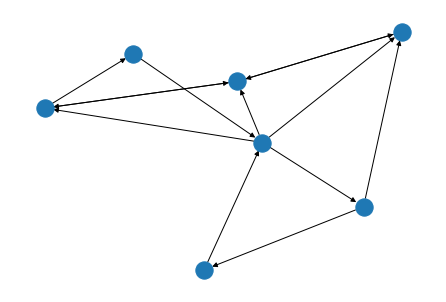

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from string import ascii_uppercase


letters = [ascii_uppercase[i] for i in range(24)]

G = nx.DiGraph()
GG = G0
for i in range(len(GG)):
    add = []
    for j in range(len(GG[i])):
        node = (letters[i], letters[GG[i][j]])
        add.append(node)
    G.add_edges_from(add, weight=1)
nx.draw(G)
plt.show()

In [8]:
# Construir la matriz de transición
def g2p(g):
    N = len(g)
    p = np.zeros((N, N))
    for i, olinks in enumerate(g):
        if len(olinks) > 0:
            p[i, olinks] = 1.0 / float(len(olinks))
    return p

# Construir la matriz de transición con PageRank
def g2p_pagerank(g, alpha):
    N = len(g)
    p = g2p(g)
    G = alpha * p + (1.0 - alpha) * np.ones((N, N)) / float(N)
    return G / G.sum(axis=1).reshape((-1, 1))

In [9]:
G = G0

In [10]:
P = np.zeros(len(G))
A = G[0]
I = []
Ns = 200
for _ in range(Ns):
    i = random.choice(A)
    I.append(i)
    A = G[i]
    P[i]+=1
    #print(A, i)

#print(P)
P = [p/Ns for p in P]

P = np.array(P)

#print(P)

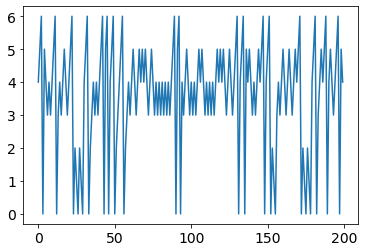

In [11]:
I = np.array(I)
plt.plot(I)
plt.show()


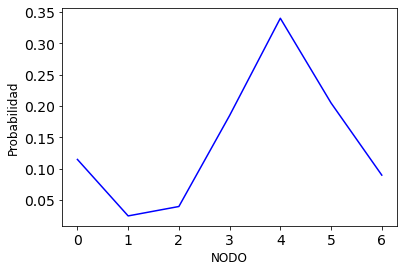

In [12]:
plt.plot(P, "-b")
plt.xlabel('NODO')
plt.ylabel('Probabilidad')
plt.show()